### TOOLs

In [2]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import seaborn as sns

### Importing data :

In [16]:
startups = pd.read_excel('startup-expansion.xlsx')
startups

,Store ID,City,State,Sales Region,New Expansion,Marketing Spend,Revenue
0,1,Peoria,Arizona,Region 2,Old,2601,48610
1,2,Midland,Texas,Region 2,Old,2727,45689
2,3,Spokane,Washington,Region 2,Old,2768,49554
3,4,Denton,Texas,Region 2,Old,2759,38284
4,5,Overland Park,Kansas,Region 2,Old,2869,59887
...,...,...,...,...,...,...,...
145,146,Paterson,New Jersey,Region 1,New,2251,34603
146,147,Brownsville,Texas,Region 2,New,3675,63148
147,148,Rockford,Illinois,Region 1,New,2648,43377
148,149,College Station,Texas,Region 2,New,2994,22457


In [4]:
startups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Store ID         150 non-null    int64 
 1   City             150 non-null    object
 2   State            150 non-null    object
 3   Sales Region     150 non-null    object
 4   New Expansion    150 non-null    object
 5   Marketing Spend  150 non-null    int64 
 6   Revenue          150 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 8.3+ KB


In [5]:
startups[['Marketing Spend','Revenue']].describe().round(2)

,Marketing Spend,Revenue
count,150.00,150.00
mean,2893.15,39301.43
std,367.86,15465.75
min,1811.00,15562.00
25%,2662.25,21113.50
50%,2898.00,42993.00
75%,3111.50,51145.50
max,3984.00,68828.00


### DATA ANALYSIS

In [6]:
startups.sample(10)

,Store ID,City,State,Sales Region,New Expansion,Marketing Spend,Revenue
64,65,El Cajon,California,Region 2,Old,2950,19529
24,25,Elk Grove,California,Region 2,Old,2918,49856
103,104,Killeen,Texas,Region 2,Old,2962,43773
104,105,Orange,California,Region 2,Old,2830,36821
39,40,Cape Coral,Florida,Region 1,Old,2886,52250
72,73,Palm Bay,Florida,Region 1,Old,2943,25321
148,149,College Station,Texas,Region 2,New,2994,22457
131,132,West Jordan,Utah,Region 2,Old,2773,21056
40,41,Syracuse,New York,Region 1,Old,2373,41313
8,9,Worcester,Massachusetts,Region 1,Old,2675,59840


<Axes: xlabel='Sales Region'>

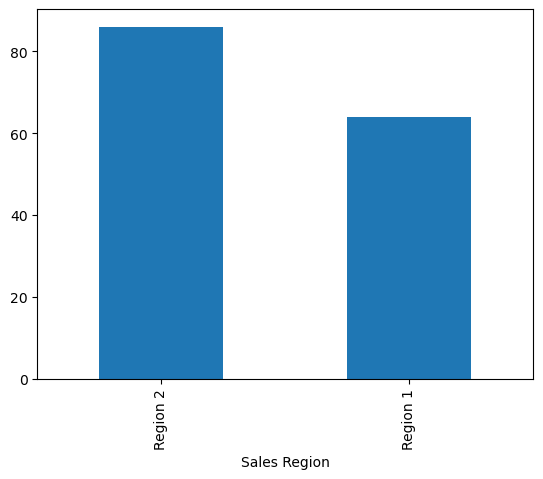

In [13]:
startups['Sales Region'].value_counts().plot.bar()

In [7]:
startups[startups['New Expansion'] == 'Old'].groupby(['State']).sum()['Revenue'].nlargest(10)

State
California     1362468
Texas           554964
Florida         479023
Washington      298013
Alabama         221025
New York        160046
Connecticut     158511
Georgia         157656
Colorado        156495
Michigan        147759
Name: Revenue, dtype: int64

In [9]:
startups[startups['New Expansion'] == 'New'].groupby(['State']).sum()['Revenue'].nlargest(10)

State
California    141883
Illinois       91692
Texas          85605
Tennessee      55357
Arizona        48954
New Jersey     34603
Name: Revenue, dtype: int64

In [20]:
startups['profit'] = startups['Revenue'] - startups['Marketing Spend']
startups ['profit']

0      46009
1      42962
2      46786
3      35525
4      57018
       ...  
145    32352
146    59473
147    40729
148    19463
149    37710
Name: profit, Length: 150, dtype: int64

In [21]:
startups['ROI'] = round((startups['profit'] / startups['Marketing Spend']) * 100 , 2)
startups['ROI']

0      1768.90
1      1575.43
2      1690.25
3      1287.60
4      1987.38
        ...   
145    1437.23
146    1618.31
147    1538.10
148     650.07
149    1551.21
Name: ROI, Length: 150, dtype: float64

In [22]:
startups['ROI%'] = round( startups ['ROI'] / 100 , 2)
startups['ROI%']

0      17.69
1      15.75
2      16.90
3      12.88
4      19.87
       ...  
145    14.37
146    16.18
147    15.38
148     6.50
149    15.51
Name: ROI%, Length: 150, dtype: float64

In [23]:
startups

,Store ID,City,State,Sales Region,New Expansion,Marketing Spend,Revenue,profit,ROI,ROI%
0,1,Peoria,Arizona,Region 2,Old,2601,48610,46009,1768.90,17.69
1,2,Midland,Texas,Region 2,Old,2727,45689,42962,1575.43,15.75
2,3,Spokane,Washington,Region 2,Old,2768,49554,46786,1690.25,16.90
3,4,Denton,Texas,Region 2,Old,2759,38284,35525,1287.60,12.88
4,5,Overland Park,Kansas,Region 2,Old,2869,59887,57018,1987.38,19.87
...,...,...,...,...,...,...,...,...,...,...
145,146,Paterson,New Jersey,Region 1,New,2251,34603,32352,1437.23,14.37
146,147,Brownsville,Texas,Region 2,New,3675,63148,59473,1618.31,16.18
147,148,Rockford,Illinois,Region 1,New,2648,43377,40729,1538.10,15.38
148,149,College Station,Texas,Region 2,New,2994,22457,19463,650.07,6.50


In [25]:
startups.to_csv('startupModified')